# Ch06 Pandas DataFrame 統計檢定

## Bi-variate Analysis (多變量分析)

Descriptive statistics between two or more variables

In statistics, when analyzing relationships between different types of variables—categorical (qualitative) and continuous (quantitative)—there are various methods used. Here's a brief overview:

1. Categorical vs. Continuous:
- Box Plots: A box plot for each category can show the distribution of a continuous variable.
- ANOVA (Analysis of Variance): Tests if there are statistically significant differences between the means of three or more independent (unrelated) groups.
- T-Test: If you only have two groups, a T-test can be used to determine if there is a significant difference between the means.
- Covariance and Correlation: Measures the direction and strength of the relationship between two continuous variables.
- Regression Analysis: Used to predict the value of a dependent (target) variable based on the value of an independent (predictor) variable.

2. Categorical vs. Categorical:
- Contingency Table (Cross-tabulation): Shows the frequency distribution of the variables.
- Chi-Squared Test: Tests the independence of two categorical variables.
- Fisher's Exact Test: Used for small sample sizes to determine if there are nonrandom associations between two categorical variables.

3. Continuous vs. Continuous:
- Scatter Plot: To visualize the relationship between two continuous variables.
- Pearson Correlation: To measure the linear correlation between two continuous variables.
- Spearman's Rank Correlation: To measure the strength and direction of association between two ranked variables.
- Regression Analysis: Can be simple linear regression for one predictor variable or multiple regression for more than one predictor.


---
# Categorical vs. Continuous
### 1. Box Plots 
Case Explanation: Suppose we have a dataset with employees' salaries (salary) and their departments (department).

  department  salary  experience
0         IT   70000           3
1         HR   50000           5
2    Finance   60000           2
3         IT   80000           7
4         HR   55000           4
5    Finance   65000           3
6         IT   90000          10
7         HR   52000           6
8    Finance   61000           4


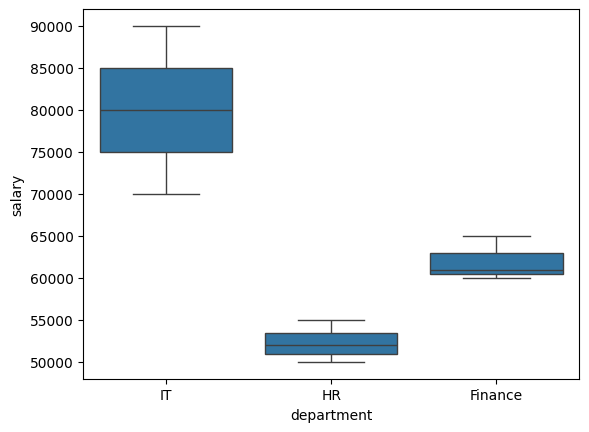

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generating the dataset for example
data = {'department': ['IT', 'HR', 'Finance', 'IT', 'HR', 'Finance', 'IT', 'HR', 'Finance'],
        'salary': [70000, 50000, 60000, 80000, 55000, 65000, 90000, 52000, 61000],
        'experience': [3, 5, 2, 7, 4, 3, 10, 6, 4]}
df = pd.DataFrame(data)


print(df)

# Box plot
sns.boxplot(x='department', y='salary', data=df)
plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


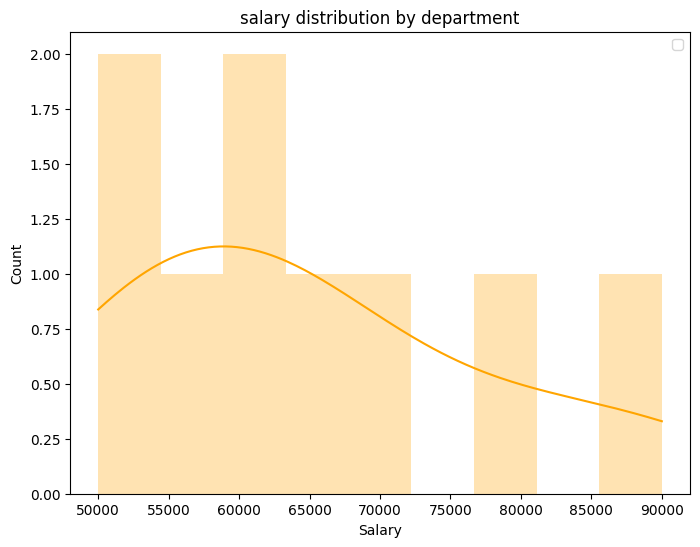

In [2]:
# Plotting the histogram
plt.figure(figsize=(8, 6))

# Set the transparency level with alpha and choose the appropriate bins
sns.histplot(df, x="salary", color="orange", kde=True, stat="count", bins=9, alpha=0.3, edgecolor=None)


# Adding legend
plt.legend()
# Adding titles and labels
plt.title('salary distribution by department')
plt.xlabel('Salary')
plt.ylabel('Count')

# Show the plot
plt.show()

- Precautions:
  
Ensure no outliers distort the visualization.
Consider the sample size for each category; too small a sample might not be representative.

- Interpretation:
  
The box plot visually shows the distribution, median, and possible outliers of salaries within each department.

### 2. T-Test
Case Explanation: To compare average salaries between two departments, say IT and HR.

In [3]:
# Two-sample T-test
import scipy.stats as stats
t_stat, p_val = stats.ttest_ind(df['salary'][df['department'] == 'IT'],
                                df['salary'][df['department'] == 'HR'])
print(f'IT vs HR, T-statistic: {t_stat}, P-value: {p_val}')
print(df)


IT vs HR, T-statistic: 4.64710784093359, P-value: 0.009682369922807656
  department  salary  experience
0         IT   70000           3
1         HR   50000           5
2    Finance   60000           2
3         IT   80000           7
4         HR   55000           4
5    Finance   65000           3
6         IT   90000          10
7         HR   52000           6
8    Finance   61000           4


In [4]:
# Two-sample T-test
import scipy.stats as stats
t_stat, p_val = stats.ttest_ind(df['salary'][df['department'] == 'Finance'],
                                df['salary'][df['department'] == 'HR'])
print(f'FINANCE vs HR, T-statistic: {t_stat}, P-value: {p_val}')
print(df)

FINANCE vs HR, T-statistic: 4.58530260724415, P-value: 0.010142733348424231
  department  salary  experience
0         IT   70000           3
1         HR   50000           5
2    Finance   60000           2
3         IT   80000           7
4         HR   55000           4
5    Finance   65000           3
6         IT   90000          10
7         HR   52000           6
8    Finance   61000           4


- Precautions:

The samples should be independent.
Assumes the populations have identical variances (consider Welch's T-test otherwise).
                                                  
- Interpretation:

A p_val < 0.05 suggests a significant difference in mean salary between IT and HR departments.

### 3. ANOVA (Analysis of Variance)
   
Case Explanation: 
Continuing with the employee dataset, suppose we want to test if there's a significant difference in average salaries among departments.

In [5]:
import scipy.stats as stats

# Assuming df is our DataFrame and we have more data
# One-way ANOVA
fvalue, pvalue = stats.f_oneway(df['salary'][df['department'] == 'IT'],
                                df['salary'][df['department'] == 'HR'],
                                df['salary'][df['department'] == 'Finance'])
print(f'F-value: {fvalue}, P-value: {pvalue}')
print(df)


F-value: 15.65588235294117, P-value: 0.004158305389202363
  department  salary  experience
0         IT   70000           3
1         HR   50000           5
2    Finance   60000           2
3         IT   80000           7
4         HR   55000           4
5    Finance   65000           3
6         IT   90000          10
7         HR   52000           6
8    Finance   61000           4


- Precautions:

Ensure the data meets ANOVA assumptions: normality, homogeneity of variances, and independent samples.
A significant p-value indicates at least one group mean is different, not which one.

- Interpretation:

If pvalue < 0.05 (common threshold), there's a significant difference in means among departments.

### 4. Covariance and Correlation
Case Explanation: To examine the relationship between years of experience (experience) and salary.

In [6]:
# Assuming 'experience' is another column in our DataFrame
correlation = df['salary'].corr(df['experience'])
covariance = df['salary'].cov(df['experience'])
print(f'Correlation: {correlation}, Covariance: {covariance}')

Correlation: 0.6124629746621465, Covariance: 20097.222222222223


- Precautions:

Correlation does not imply causation.
The magnitude of covariance is not standardized, making it harder to interpret.
- Interpretation:

Correlation close to 1 or -1 indicates a strong relationship; near 0 suggests weak or no linear relationship.

### 5. Regression Analysis
Case Explanation: Predicting an employee's salary based on their years of experience.

In [7]:
import statsmodels.api as sm

X = sm.add_constant(df['experience'])  # Adding a constant for the intercept
model = sm.OLS(df['salary'], X).fit()  # Ordinary Least Squares regression
predictions = model.predict(X)

print(df)
print(model.summary())


  department  salary  experience
0         IT   70000           3
1         HR   50000           5
2    Finance   60000           2
3         IT   80000           7
4         HR   55000           4
5    Finance   65000           3
6         IT   90000          10
7         HR   52000           6
8    Finance   61000           4
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     4.202
Date:                Sun, 24 Mar 2024   Prob (F-statistic):             0.0795
Time:                        19:38:50   Log-Likelihood:                -95.567
No. Observations:                   9   AIC:                             195.1
Df Residuals:                       7   BIC:                             195.5
Df Model:                           1 

C:\Users\xdxd2\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


- Precautions:

Check for linearity assumption between the variables.
Beware of multicollinearity if multiple predictors are used.

- Interpretation:

The model summary provides coefficients, p-values for the predictors, and model fit statistics. A significant p-value for the experience coefficient suggests a meaningful relationship with salary.
This step-by-step guide covers the basics of implementing and interpreting each statistical method. Each example presumes a certain structure of the dataset, which you may need to adjust according to your actual data.